In [ ]:
import tweepy
import numpy as np                 # used for framework
import pandas as pd                # used for data analysis
import seaborn as sns              # used for data visualization 
import re                          # used for regular expressions
import nltk                        # natural lanuage tool kit
import matplotlib.pyplot as plt    # used for graphs 
get_ipython().magic('matplotlib inline')

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_source_url = "https://raw.githubusercontent.com/AbhinavBahuguna2002/Sentiment-Analysis-of-Tweets/main/Tweets.csv" 
# Linking the dataset
airline_tweets = pd.read_csv(data_source_url)
# Data set passed into panda for framework 

In [ ]:
airline_tweets.head()
# Visualization of top 5 Entries

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
# Checking the default plot size 

6.0
4.0


In [ ]:
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
# Changing the def plot size

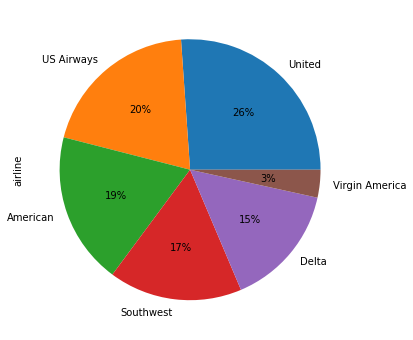

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
#Checking the number of tweets for each airline and ploting a pie chart for it

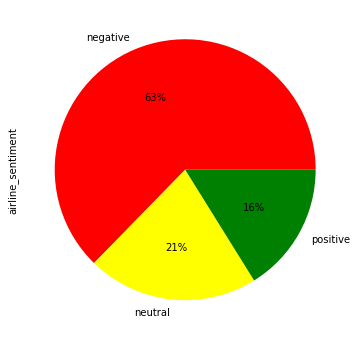

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
#Checking the distribution of sentiments and ploting a pie chart for it  

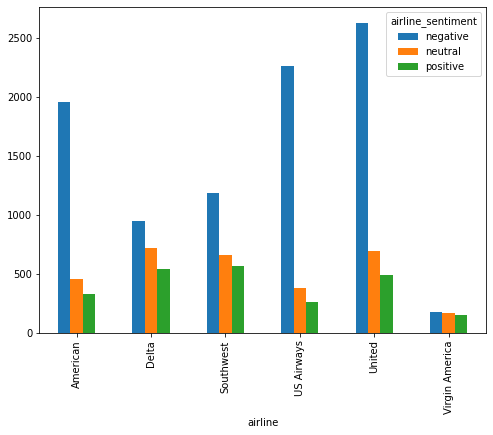

In [ ]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
# Checking the distribution of sentiments in each of the airlines and ploting a bar graph for the same

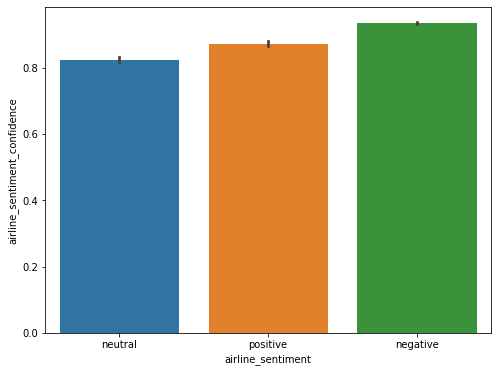

In [ ]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)
# Checking the confidence of the sentiments and ploting a bar graph for it
# Visualization OF Data is Completed

In [ ]:
features = airline_tweets.iloc[:, 10].values 
labels = airline_tweets.iloc[:, 1].values
# Extraction of columns for Features and Lables variabes

In [ ]:
processed_features = []
# Creating Empty Array

for sentence in range(0, len(features)):
# Loop For Data Cleansing
    
    # Removing all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Removing all the single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Removing single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Conversion to Lowercase
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# Vectorize the most repeating words and pass them as features
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(vectorizer.get_feature_names_out())

['00' '000' '05' ... 'yyz' 'zero' 'zone']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
# Spliting the Dataset into Train and Test

              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1870
     neutral       0.64      0.50      0.56       614
    positive       0.81      0.61      0.70       444

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

Accuracy= 0.788


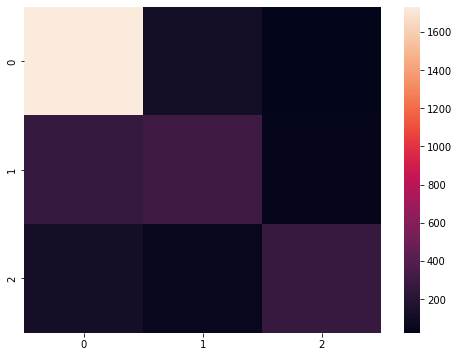

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(random_state=0, max_iter=200)
logreg.fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)

sns.heatmap(confusion_matrix(y_test,pred_logreg))
print(classification_report(y_test,pred_logreg))
print("Accuracy= {:.3f}".format(accuracy_score(y_test, pred_logreg)))

In [ ]:
# Logistic Regression
review = "the flight was really uncomfortable"
print(logreg.predict(vectorizer.transform([review]))[0] + '\n')

review = 'the flight went great'
print(logreg.predict(vectorizer.transform([review]))[0])

negative

positive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Using the Random Forest Approach

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
# Fitiing the model to Random Forest Classifier

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
predictions = text_classifier.predict(X_test)
# Predictions For the Random Forest Classifier

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

Accuracy= 0.760


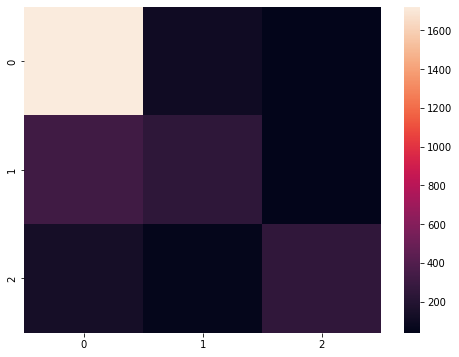

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.heatmap(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

print("Accuracy= {:.3f}".format(accuracy_score(y_test, predictions)))
# Printing the Predictions for Random Forest Classifier
# Printing the Confusion Matrix to visualize the predictions

In [ ]:
review = "the flight was really uncomfortable"
print(text_classifier.predict(vectorizer.transform([review]))[0] + '\n')

review = 'the flight went great'
print(text_classifier.predict(vectorizer.transform([review]))[0])

negative

positive


In [ ]:
## Accessing Indian airline tweets via Twitter API

"""
Usernames:- 
Air India- airindiain
IndiGo- IndiGo6E
Spice Jet- flyspicejet
Air Asia- AirAsiaIndia

"""

'\nUsernames:- \nAir India- airindiain\nIndiGo- IndiGo6E\nSpice Jet- flyspicejet\nAir Asia- AirAsiaIndia\n\n'

In [ ]:
#Twitter API Credentials 
apiKey = ""
apiSecret = ""
accessToken = ""
accessTokenSecret = ""


In [ ]:
#creating the authentication object 
authenticate = tweepy.OAuthHandler (apiKey, apiSecret)

#setting access token and access token secret 
authenticate.set_access_token(accessToken, accessTokenSecret)

#creating a api object
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#Extract n tweets from Twitter user 
post = api.user_timeline(screen_name = "airindiain", count= 10, lang = "en", tweet_mode = "extended")
i=1
for tweet in post [0:5]:
  print (str(i) + ')' + tweet.full_text) 
  print('Sentiment= ' + text_classifier.predict(vectorizer.transform([tweet.full_text]))[0] +'\n')
  i = i+1

1)@sasinamburi Dear Mr. Namburi, we would like to investigate it. Request you to please elaborate on your specific issue via DM for us to assist you.
Sentiment= negative

2)@imvenkatvimal Dear Sir, as checked, the name format is as per our reservation system. Request you to please get In touch with our ground team at departure airport for assistance in this regard.
Sentiment= negative

3)@tah_tan Dear Mr. Tankiwala, we regret the inconvenience caused to you. Please help us with your ticket details via DM for us to check and assist you.
Sentiment= negative

4)@AravindaPhani We regret the inconvenience caused to you. Please help us with your ticket details via DM for us to check and assist you.
Sentiment= negative

5)@SoniBhatia7 Dear Ms. Bhatia, we regret to know about your bag. Kindly DM your ticket no., email id, contact details, bag tag no. and File ref no./PIR copy for us to check with our concerned baggage team.
Sentiment= negative



#End of project